In [134]:
import pandas as pd
import numpy as np
from basicDataInspection import DataInspector,SummaryInspectionStrategy
from sklearn.preprocessing import StandardScaler
from bivariateAnalysis import BivariateStrategy,CategoricalVsCategoricalAnalysis,CategoricalVsNumericalAnalysis,NumericalVsNumericalAnalysis
from ingestData import DataIngesterFactory
from handleMissingValue import MissingValuesHandlingFactory
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
dataIngest= DataIngesterFactory()
filename = "C:\\Users\\Admin\\Documents\\practice\\ml\\mlops\\dataSet\\HouseData.zip"
ingest = dataIngest.getData(filepath=filename)
df = ingest.ingest()


df.drop_duplicates(inplace=True)

df.drop(["Order","PID"],axis=1,inplace=True)
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
univariateAnalysis = DataInspector(SummaryInspectionStrategy())
univariateAnalysis.ExecuteInspection(df.select_dtypes(include=["object"]))

Summary (Numerical Features) : 
       MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
count       2930   2930   198      2930         2930      2930       2930   
unique         7      2     2         4            4         3          5   
top           RL   Pave  Grvl       Reg          Lvl    AllPub     Inside   
freq        2273   2918   120      1859         2633      2927       2140   

       Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
count        2930         2930        2930  ...        2773          2771   
unique          3           28           9  ...           6             3   
top           Gtl        NAmes        Norm  ...      Attchd           Unf   
freq         2789          443        2522  ...        1731          1231   

       Garage Qual Garage Cond Paved Drive Pool QC  Fence Misc Feature  \
count         2771        2771        2930      13    572          106   
unique           5           5           3      

Visualising the null values : 


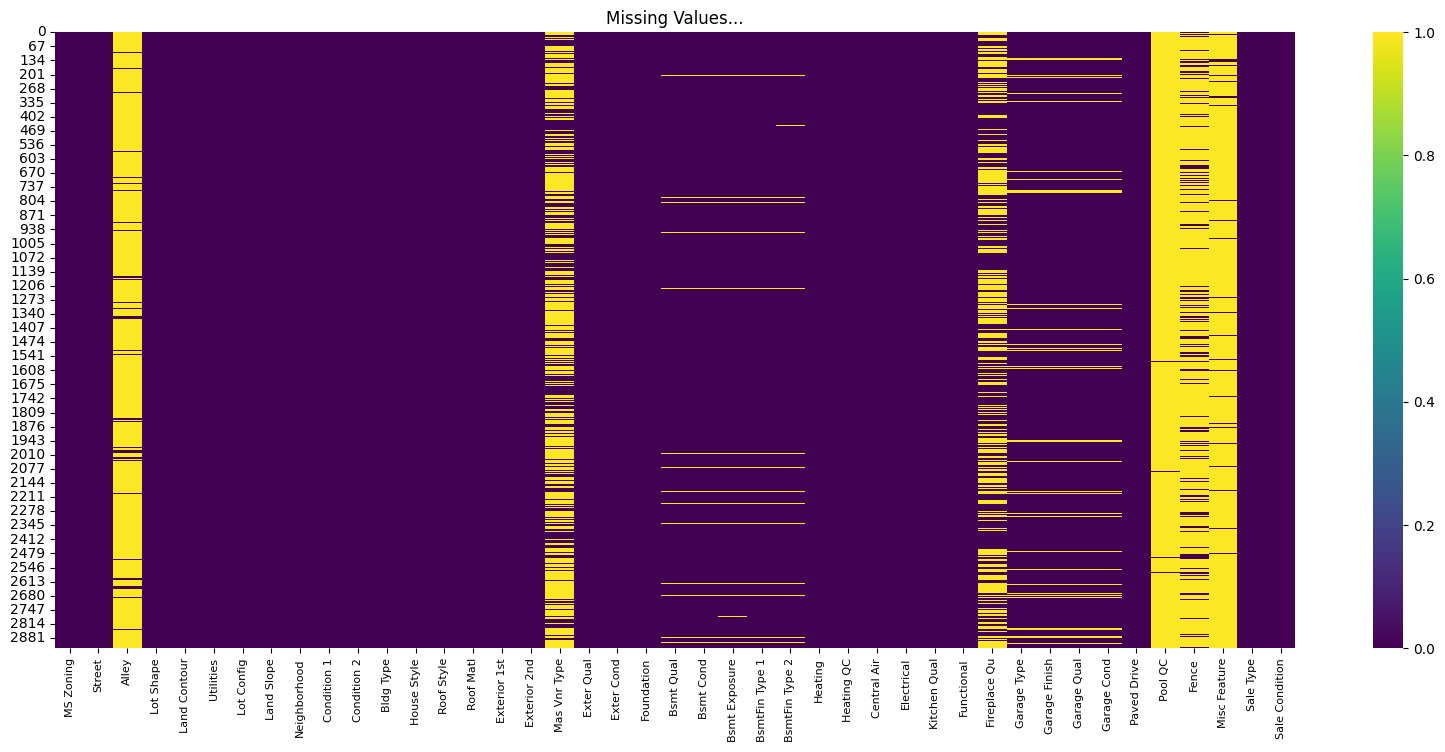

Missing values in the DataFrame : 
                Missing Values Data Tyoe 
Alley                     2732     object
Mas Vnr Type              1775     object
Bsmt Qual                   80     object
Bsmt Cond                   80     object
Bsmt Exposure               83     object
BsmtFin Type 1              80     object
BsmtFin Type 2              81     object
Electrical                   1     object
Fireplace Qu              1422     object
Garage Type                157     object
Garage Finish              159     object
Garage Qual                159     object
Garage Cond                159     object
Pool QC                   2917     object
Fence                     2358     object
Misc Feature              2824     object


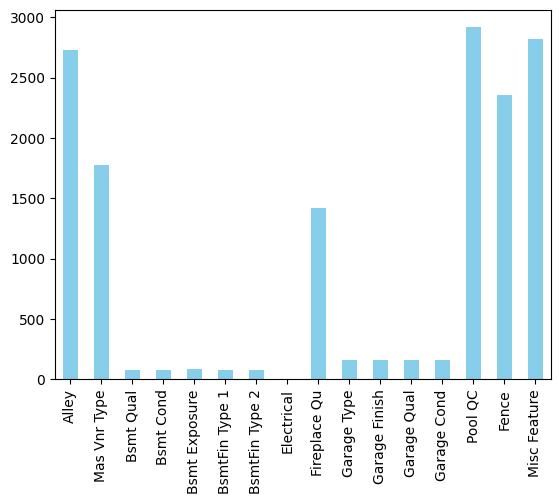

In [4]:
missingValues = MissingValuesHandlingFactory(method="mn")
missingValues.analyze(df.select_dtypes(include=["object"]))


Visualising the null values : 


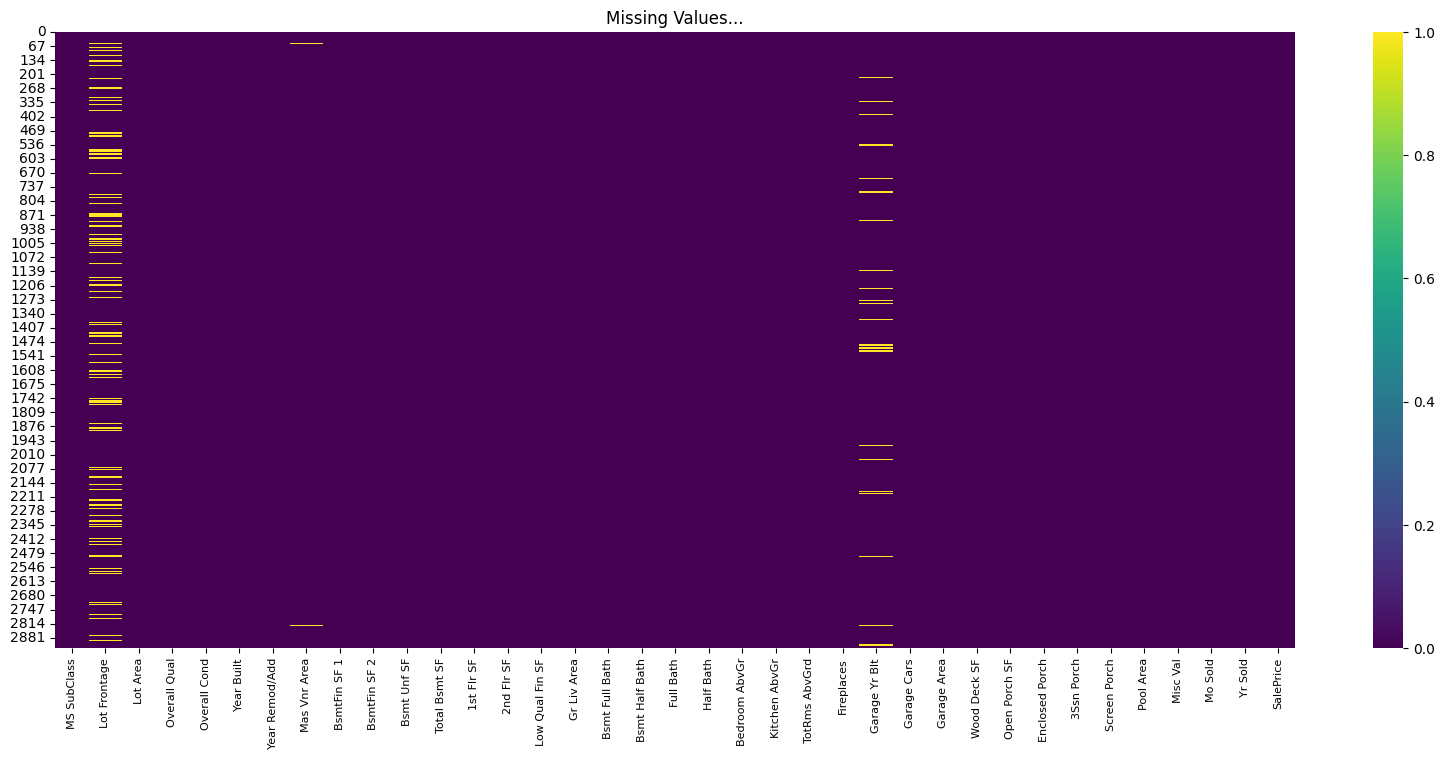

Missing values in the DataFrame : 
                Missing Values Data Tyoe 
Lot Frontage               490    float64
Mas Vnr Area                23    float64
BsmtFin SF 1                 1    float64
BsmtFin SF 2                 1    float64
Bsmt Unf SF                  1    float64
Total Bsmt SF                1    float64
Bsmt Full Bath               2    float64
Bsmt Half Bath               2    float64
Garage Yr Blt              159    float64
Garage Cars                  1    float64
Garage Area                  1    float64


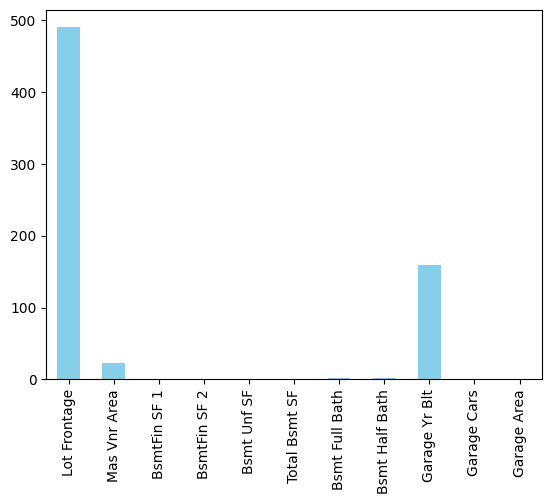

In [5]:
missingValues.analyze(df.select_dtypes(exclude=["object"]))

### "Misc Feature","Fence","Pool QC","Alley","Mas Vnr Type","Fireplace Qu " these features have nearly 70% of data is missing on average so dropping the columns

In [6]:
droppedCol = missingValues.dropCol(df,["Misc Feature","Fence","Pool QC","Alley","Mas Vnr Type","Fireplace Qu"],axis=1)

droppedCol

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [7]:
cleanedDf = missingValues.handle(droppedCol)
cleanedDf

skipping... MS SubClass
skipping... Lot Area
skipping... Overall Qual
skipping... Overall Cond
skipping... Year Built
skipping... Year Remod/Add
skipping... 1st Flr SF
skipping... 2nd Flr SF
skipping... Low Qual Fin SF
skipping... Gr Liv Area
skipping... Full Bath
skipping... Half Bath
skipping... Bedroom AbvGr
skipping... Kitchen AbvGr
skipping... TotRms AbvGrd
skipping... Fireplaces
skipping... Wood Deck SF
skipping... Open Porch SF
skipping... Enclosed Porch
skipping... 3Ssn Porch
skipping... Screen Porch
skipping... Pool Area
skipping... Misc Val
skipping... Mo Sold
skipping... Yr Sold
skipping... SalePrice


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [8]:
bivariateAnalysis = BivariateStrategy(NumericalVsNumericalAnalysis())
target = "SalePrice"
numericalFeatures = cleanedDf.select_dtypes(exclude=["object"]).columns
targetDf = cleanedDf[target]
features = {}
for col in numericalFeatures:
    if col == target:
        continue
    ratio = bivariateAnalysis.Anova(cleanedDf,col,target,Return=True)
    try:
        if(ratio[1] < 1e-50):
            features[col] = (ratio[0],ratio[1])
    except Exception as e:
        pass
cleanedDf

Insufficient valid groups for ANOVA between Pool Area and SalePrice


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [9]:
bivariateAnalysis.set_strategy(CategoricalVsNumericalAnalysis())
columnFeatures = cleanedDf.select_dtypes(include=["object"]).columns

for col in columnFeatures:
    if col == target:
        continue
    ratio = bivariateAnalysis.Anova(cleanedDf,col,target,Return=True)
    try:
        if(ratio[1] < 1e-50):
            features[col] = (ratio[0],ratio[1])
    except Exception as e:
        pass
features

{'MS SubClass': (68.54160813588852, 2.3979835357830658e-168),
 'Lot Frontage': (11.19515397948783, 1.412321195561084e-144),
 'Lot Area': (5.725210261013266, 4.89249017668155e-103),
 'Overall Qual': (765.2200842729998, 0.0),
 'Overall Cond': (64.57561536095018, 9.118001992876699e-98),
 'Year Built': (20.97699270957595, 6.101322257191747e-275),
 'Year Remod/Add': (22.828578481371324, 2.3272324878386168e-197),
 'Mas Vnr Area': (4.793358233491883, 9.27592374832982e-92),
 'Total Bsmt SF': (5.0844632721867224, 1.4686130626408005e-157),
 '1st Flr SF': (3.9520027022677624, 1.523088762924105e-115),
 'Gr Liv Area': (4.6578195137661496, 1.5548792701065253e-139),
 'Bsmt Full Bath': (81.86964905995674, 7.413409365543701e-51),
 'Full Bath': (332.5261408212701, 3.880472602547531e-236),
 'Half Bath': (144.78797201446616, 1.0934876253690294e-60),
 'TotRms AbvGrd': (114.57426998751393, 1.7707950851915014e-184),
 'Fireplaces': (309.3864266487829, 1.8978525135476648e-174),
 'Garage Yr Blt': (19.9527906040

In [10]:
featuresDf = cleanedDf[list(features.keys())]
featuresDf

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,...,Bsmt Qual,Bsmt Exposure,BsmtFin Type 1,Heating QC,Kitchen Qual,Garage Type,Garage Finish,Paved Drive,Sale Type,Sale Condition
0,20,141.00000,31770,6,5,1960,1960,112.0,1080.0,1656,...,TA,Gd,BLQ,Fa,TA,Attchd,Fin,P,WD,Normal
1,20,80.00000,11622,5,6,1961,1961,0.0,882.0,896,...,TA,No,Rec,TA,TA,Attchd,Unf,Y,WD,Normal
2,20,81.00000,14267,6,6,1958,1958,108.0,1329.0,1329,...,TA,No,ALQ,TA,Gd,Attchd,Unf,Y,WD,Normal
3,20,93.00000,11160,7,5,1968,1968,0.0,2110.0,2110,...,TA,No,ALQ,Ex,Ex,Attchd,Fin,Y,WD,Normal
4,60,74.00000,13830,5,5,1997,1998,0.0,928.0,928,...,Gd,No,GLQ,Gd,TA,Attchd,Fin,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.00000,7937,6,6,1984,1984,0.0,1003.0,1003,...,TA,Av,GLQ,TA,TA,Detchd,Unf,Y,WD,Normal
2926,20,69.22459,8885,5,5,1983,1983,0.0,864.0,902,...,Gd,Av,BLQ,TA,TA,Attchd,Unf,Y,WD,Normal
2927,85,62.00000,10441,5,5,1992,1992,0.0,912.0,970,...,Gd,Av,GLQ,TA,TA,Attchd,Unf,Y,WD,Normal
2928,20,77.00000,10010,5,5,1974,1975,0.0,1389.0,1389,...,Gd,Av,ALQ,Gd,TA,Attchd,RFn,Y,WD,Normal


In [11]:
categoricalFeatures = featuresDf.select_dtypes(include=["object"]).columns  

for col in categoricalFeatures:

    onehot = pd.get_dummies(featuresDf[col])
    

    featuresDf = featuresDf.drop(columns=[col])
    featuresDf = pd.concat([featuresDf, onehot], axis=1)


In [116]:
print(featuresDf.columns)

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF',
       ...
       'New', 'Oth', 'VWD', 'WD ', 'Abnorml', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=156)


In [12]:
scaler = StandardScaler()
numerical = featuresDf.select_dtypes(exclude=["object"])

scaledFeatures= scaler.fit_transform(numerical)

scaledDf = pd.DataFrame(scaledFeatures, columns=numerical.columns, index=featuresDf.index)

for col in numerical.columns:
    featuresDf[col] = scaledDf[col]


In [88]:
targetDf = scaler.fit_transform(pd.DataFrame(targetDf))
targetDf

array([[ 0.42822875],
       [-0.94895652],
       [-0.11012549],
       ...,
       [-0.61092014],
       [-0.13516523],
       [ 0.09019236]])

In [131]:
x_test,x_train,y_test,y_train = train_test_split(featuresDf,targetDf,test_size=0.8)

xTrain = x_train.to_numpy()

yTrain = y_train.ravel()

xTest = x_test.to_numpy()

yTest = y_test.ravel()

reggression = LinearRegression()
reggression.fit(xTrain,yTrain)


score = reggression.score(xTest,yTest)
print(f"R^2 Score: {score}")

R^2 Score: 0.9128692294614252


In [125]:

print(len(xTest.shape),len(xTrain.shape))

2 2


In [132]:

y_pred = reggression.predict(xTest)


In [133]:
rmse = mean_squared_error(yTest,y_pred)
rmse

0.08207883562000363

In [129]:

# Initialize the model
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model
random_forest.fit(xTrain, yTrain)



RandomForestRegressor(n_estimators=500, random_state=42)

In [130]:
# Make predictions
y_pred = random_forest.predict(x_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


RMSE: 0.35725507057022127
R^2 Score: 0.8908302429996111


c:\Users\Admin\Documents\practice\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [139]:
cv_scores = cross_val_score(reggression, xTrain, yTrain, cv=5, scoring='neg_mean_squared_error')
cv_scores

array([-0.17422809, -0.11492056, -0.21401279, -0.09665411, -0.13902635])

In [140]:
mse_scores = -cv_scores

# Calculate RMSE by taking the square root of the mean MSE
rmse = np.sqrt(np.mean(mse_scores))

print(f"Cross-Validation RMSE: {rmse}")

Cross-Validation RMSE: 0.3844065305384756
